In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

PROJECT_ROOT = Path.cwd().parent
DATA_PATH = PROJECT_ROOT / "data"

DATA_PATH.mkdir(exist_ok=True)

TEST_SIZE = 0.2
RANDOM_STATE = 42

In [3]:
df = pd.read_csv(DATA_PATH / "creditcard.csv")

print(f"Shape: {df.shape}")
print("\nHead:")
display(df.head())

print("\nInfo:")
df.info()

Shape: (284807, 31)

Head:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21

Legitimate transactions (Class=0): 284315
Fraud transactions (Class=1): 492
Fraud percentage: 0.1727%


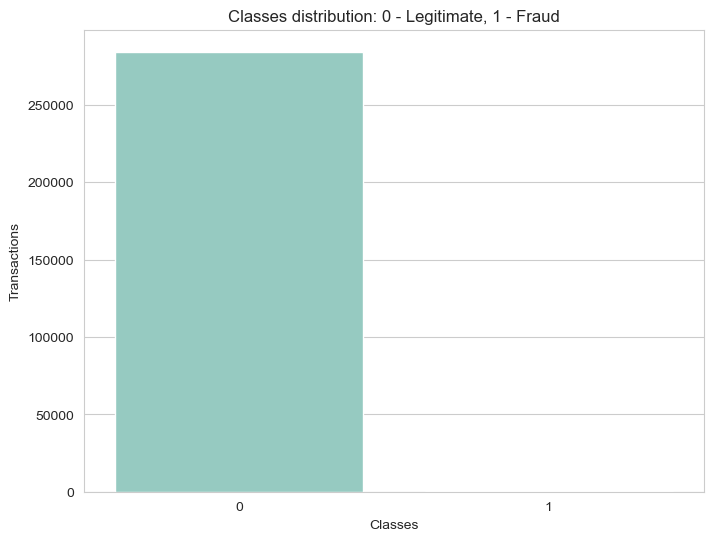

In [6]:
class_counts = df['Class'].value_counts()
fraud_percentage = (class_counts[1] / class_counts.sum()) * 100

print(f"Legitimate transactions (Class=0): {class_counts[0]}")
print(f"Fraud transactions (Class=1): {class_counts[1]}")
print(f"Fraud percentage: {fraud_percentage:.4f}%")

plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Classes distribution: 0 - Legitimate, 1 - Fraud')
plt.ylabel('Transactions')
plt.xlabel('Classes')
plt.show()

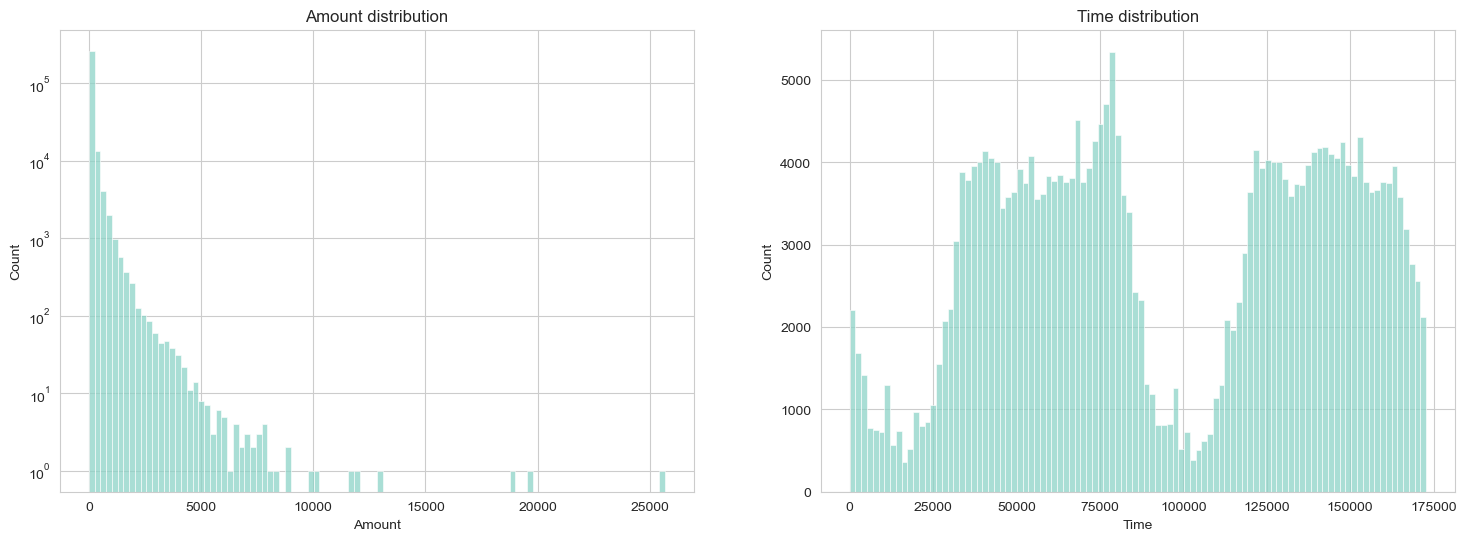

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

sns.histplot(df['Amount'], bins=100, ax=ax1)
ax1.set_title('Amount distribution')
ax1.set_yscale('log')

sns.histplot(df['Time'], bins=100, ax=ax2)
ax2.set_title('Time distribution')

plt.show()

In [8]:
df_processed = df.copy()

scaler = StandardScaler()
df_processed['scaled_Amount'] = scaler.fit_transform(df_processed['Amount'].values.reshape(-1, 1))

df_processed = df_processed.drop(['Time', 'Amount'], axis=1)

target_col = df_processed.pop('Class')
df_processed['Class'] = target_col

print("Processed DataFrame:")
display(df_processed.head())

Processed DataFrame:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [9]:
X = df_processed.drop('Class', axis=1)
y = df_processed['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)

print(f"X_train Shape: {X_train.shape}")
print(f"X_test Shape: {X_test.shape}")

print(f"\ny_train Fraud percentage: {y_train.mean() * 100:.4f}%")
print(f"y_test Fraud percentage: {y_test.mean() * 100:.4f}%")

X_train Shape: (227845, 29)
X_test Shape: (56962, 29)

y_train Fraud percentage: 0.1729%
y_test Fraud percentage: 0.1720%


In [13]:
X_train.to_feather(DATA_PATH / 'X_train.feather')
X_test.to_feather(DATA_PATH / 'X_test.feather')
y_train.to_frame().to_feather(DATA_PATH / 'y_train.feather')
y_test.to_frame().to_feather(DATA_PATH / 'y_test.feather')